In [1]:
# %matplotlib widget
%pylab inline
#%pylab widget
# pylab.rcParams['figure.figsize'] = (8, 3)
import  general.utils as utils
import result_analyse.resultloader
import result_analyse.visualisation as vs

from ipywidgets import interact, interactive, fixed, interact_manual,widgets
import numpy as np
import pandas as pd
@interact
def result_selector(file=result_analyse.resultloader.get_runs()):
    if(file==None):return
    print('Analysing ',file)
    run_info,dataset,evalres=utils.loadState(file)
    stime=dataset.activity_events.iloc[0].StartTime
    #etime=stime+np.timedelta64(1,'D')
    etime=dataset.activity_events.iloc[-1].EndTime

    for i in range(len(evalres)):
            quality=evalres[i].quality
            print('Evalution quality fold=%d is %s' % (i, quality))
    print(len(dataset.sensor_events))
    
#     vs.plot_CM(dataset,evalres)
    
    @interact
    def viewFold(fold= range(len(evalres))):
        @interact_manual
        def view(start_date=widgets.DatePicker(value=pd.to_datetime(stime)),end_date=widgets.DatePicker(value=pd.to_datetime(etime))):
            duration=(pd.to_datetime(start_date),pd.to_datetime(end_date))
            real_events=vs.filterTime(evalres[fold].real_events,duration)
            pred_events=vs.filterTime(evalres[fold].pred_events,duration)
            #vs.plotJoinAct(dataset,real_events,pred_events)
            acts=[p for p in dataset.activities_map]
            labels=[dataset.activities_map[p] for p in acts]
            print(acts)
            print(labels)
            vs.plotJoinAct2(real_events,pred_events,acts,labels)
            #vs.plot_per_act(dataset,{'test':evalres})
            
            from matplotlib import pyplot as plt
            import result_analyse.SpiderChart
            result_analyse.SpiderChart.radar_factory(5, frame='polygon')
            acount=len(dataset.activities_map)
            a_fig,a_ax=plt.subplots(acount-1,1,figsize=(10, acount*.25),)
#             a_fig.tight_layout(pad=3.0)
            col=4        
            row=int(np.ceil((acount-1.0)/float(col)))
            m_fig,m_ax=plt.subplots(row,col,figsize=(col*3, row*3),subplot_kw=dict(projection='radar'))
            if type(a_ax)!=numpy.ndarray:
                print('dddd',a_ax)
                print(type(a_ax))
                a_ax=np.array([a_ax])
            else:
                m_ax=m_ax.flatten()
            for i in range(acount-1,len(m_ax)):
                m_ax[i].set_visible(False)

            for i in range(1,len(dataset.activities_map)):
#                 real_events2,pred_events2=vs.remove_gaps(real_events,pred_events,i)
                #real_events2,pred_events2=vs.remove_gaps(real_events,pred_events,i,max_events=10)
                real_events2,pred_events2=real_events,pred_events
#                 vs.plotJoinAct(dataset,real_events,pred_events,onlyAct=i,ax=a_ax[i-1])
                try:
                    vs.plotJoinAct(dataset,real_events2,pred_events2,onlyAct=i,ax=a_ax[i-1])
                    vs.plotMyMetric2(dataset,real_events2,pred_events2,onlyAct=i,ax=m_ax[i-1],debug=1,calcne=0)
                except:
                    import sys
                    import traceback
                    print(e, file=sys.stderr)
                    traceback.print_exc()

                #    print('error in ',i)
                #vs.plotWardMetric(dataset,real_events,pred_events,onlyAct=i)
#             vs.plotJoinMyMetric(dataset,real_events2,pred_events2,calcne=0)
            a_fig.show()
            m_fig.tight_layout(pad=0,h_pad=-20.0, w_pad=3.0)
            m_fig.show()
                
#             @interact
#             def view2(onlyAct=[(str(i)+" : "+dataset.activities[i],i)for i in dataset.activities_map]):
#                 print(onlyAct)
#                 #vs.visualize(dataset)
#                 # vs.my_result_analyse(evalres[i].real_events,evalres[i].pred_events)               
#                 #vs.plotJoinAct(dataset,real_events,pred_events,onlyAct=onlyAct)
#                 real_events2,pred_events2=vs.remove_gaps(real_events,pred_events,onlyAct)
#                 vs.plotJoinAct(dataset,real_events2,pred_events2,onlyAct=onlyAct)
#                 vs.plotMyMetric(dataset,real_events,pred_events,onlyAct=onlyAct)
#                 vs.plotWardMetric(dataset,real_events,pred_events,onlyAct=onlyAct)



Populating the interactive namespace from numpy and matplotlib
Utils loaded successfully!!
metric  ==>  ['classical', 'CMbasedMetric', 'EventBasedMetric', 'event_confusion_matrix', 'metric_abstract', 'MyMetric']


interactive(children=(Dropdown(description='file', options=(('200206_23-46-58-A4H', '200206_23-46-58-A4H'), ('…

In [ ]:
import pandas as pd
pred=pd.read_csv('save_data/asghari/b1/output1.csv', header=0, names=["StartTime", "EndTime", "Activity"])
st = pd.to_datetime(pred['StartTime'], format='%Y-%m-%d %H:%M:%S')
et = pd.to_datetime(pred['EndTime'], format='%Y-%m-%d %H:%M:%S')
pred['StartTime'] = st

pred['EndTime'] = et
pred['Activity'] =pred.Activity.apply(lambda x: dataset.activities_map_inverse[x])
evalres[0].pred_events=pred

{'None': 0,
 'Bathing': 1,
 'Bed_Toilet_Transition': 2,
 'Eating': 3,
 'Enter_Home': 4,
 'Housekeeping': 5,
 'Leave_Home': 6,
 'Meal_Preparation': 7,
 'Personal_Hygiene': 8,
 'Sleeping_Not_in_Bed': 9,
 'Sleeping_in_Bed': 10,
 'Take_Medicine': 11}

In [19]:
run_info,dataset,evalres=utils.loadState('200211_12-39-09-Home1')

In [22]:
evalres[0].pred_events=pred
stime=evalres[0].pred_events.iloc[0].StartTime
etime=evalres[0].pred_events.iloc[-1].EndTime
rstime=evalres[0].real_events.iloc[0].StartTime
retime=evalres[0].real_events.iloc[-1].EndTime

stime,etime,rstime,retime

(Timestamp('2009-07-17 15:52:22'),
 Timestamp('2009-08-03 22:16:23'),
 Timestamp('2009-07-17 15:52:25.218001'),
 Timestamp('2009-08-03 22:13:48.171001'))

In [21]:
evalres[0].real_events=evalres[0].real_events.loc[evalres[0].real_events.EndTime>=stime].loc[evalres[0].real_events.StartTime<=etime]

In [17]:
evalres[0]=evalres[4]

In [23]:

evalres[0].Sdata=None
evalres[0].predicted=None
evalres[0].shortrunname="Asghari_b1"
evalres[0].predicted_classes=None
evalres[0].event_cm=None
evalres[0].quality={'accuracy': 0, 'precision': .45, 'recall': 0.61, 'f1': 0.52}
evalres[0].pred_events=pred

In [24]:

utils.saveState([run_info,dataset,{0:evalres[0]}],'asghari-Home1')

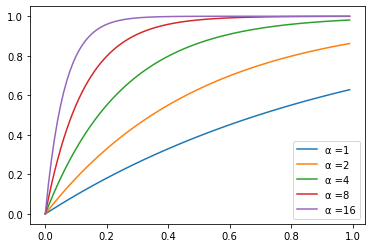

In [30]:
p,ax=plt.subplots()
alpha=1
x=numpy.arange(0,1,.01)

for alpha in [1, 2, 4, 8 ,16]:
    y=1-np.exp(-alpha *x)
    ax.plot(x,y, label='\u03B1 ='+str(alpha))
ax.legend()

